In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil
import matplotlib.ticker as ticker



output_folder = '../output/'
fontsize = 18
labelsize = 14

dblp_prev_infected_degree_range.pdf


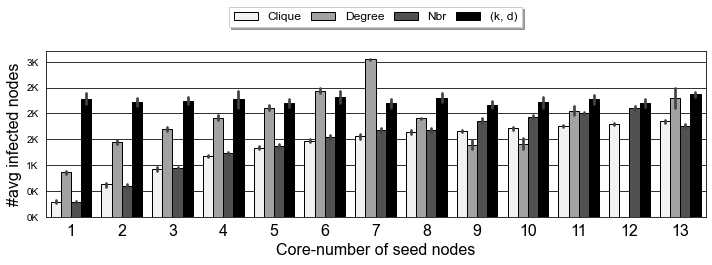

<Figure size 432x288 with 0 Axes>

In [2]:
final_legend_dic = {
    'nbr': 'Nbr',
    'degree': 'Degree',
    'clique': 'Clique',
    'kd': '(k, d)',
    "dk": '(d, k)'
}

save = True


dataset = "dblp"
processed_filename = '../output/processed_propagation_result_prev_9a_' + dataset + '.csv'
result_df = pd.read_csv(processed_filename)
# result_df = result_df[result_df['algo'] != 'kd']
result_df['algo'] = result_df['algo'].replace(final_legend_dic)
for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
    fig, ax = plt.subplots(figsize=(10, 4))
    bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos, data=result_df[result_df['core number'] <= 13], color='k')
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
    plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    plt.xticks(fontsize=fontsize-2)
    # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)


    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_degree_range.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
        plt.show()
    plt.clf()
    # break

In [3]:
for key, item in result_df.groupby(['core number'], as_index=False):
    if(item[item['algo'] == 'Nbr'].shape[0] == 0):
        continue
    infected_clique = item[item['algo'] == 'Clique']['infected'].mean()
    infected_nbr = item[item['algo'] == 'Nbr']['infected'].mean()
    infected_degree = item[item['algo'] == 'Degree']['infected'].mean()
    # print(key, round(infected_nbr - infected_degree, 2))
    print(key, round(infected_nbr - infected_clique, 2))
    # if(infected_degree <= infected_nbr):
    #     # print(key, round(infected_nbr, 2), round(infected_clique, 2))
    #     # print(key, round(infected_nbr - infected_clique, 2))
    #     print(key, round(infected_nbr - infected_clique, 2))
    #     print(key)
    # else:
    #     print(key)
    #     # print(key, round(infected_nbr - infected_clique, 2))

1 -6.49
2 -25.55
3 18.63
4 51.45
5 40.56
6 71.14
7 121.53
8 40.74
9 193.84
10 215.22
11 245.03
12 316.28
13 -85.62
14 -275.34
15 -284.09
16 -333.37
17 -507.97
18 -445.44
19 -535.02
20 -474.82
21 -570.72
22 -618.09
23 -709.86
24 -672.96
25 -696.63
26 -733.78
27 -871.31
28 -720.04
29 -507.53
30 -851.24
31 -908.82
32 -588.85
33 -1000.13
34 -1243.08
35 -629.41
36 -535.6
37 -1082.19
38 -1024.08
39 5.54
40 -22.34
41 -26.57
42 25.28
43 -24.08
44 3.13
45 -20.96
46 10.18
47 -14.28
48 5.71
49 -244.12
50 -606.69
51 53.82
52 0.87
53 -0.42
54 6.21
55 14.99
56 -40.85
58 2.91
59 4.74
60 4.75
61 2.18
63 6.25
64 67.5
66 5.11
68 21.29
69 -3.73
70 13.77
71 42.74
72 15.04
73 -873.84
75 9.84
77 58.82
84 -2.21
88 -15.28
89 -6.16
90 0.86
93 4.25
94 -3.85
101 -3.68
111 -24.73
113 16.53
135 23.24
252 4.36
279 6.63


dblp_prev_infected_nbr_range.pdf


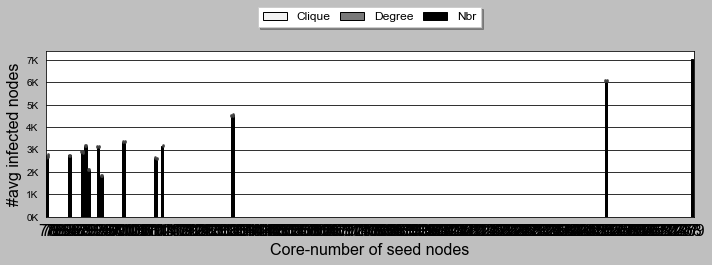

<Figure size 432x288 with 0 Axes>

In [4]:
for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)'][:3]
    
    fig, ax = plt.subplots(figsize=(10, 4))
    bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number'] >= 77)], color='k')
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
    plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    plt.xticks(fontsize=fontsize-2)
    # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)


    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_nbr_range.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
        plt.show()
    plt.clf()
    # break

In [5]:
# result_df = pd.read_csv(processed_filename)
dic_sorted_core = {}
for algo in result_df['algo'].unique():
    dic_sorted_core[algo] = list(-np.sort(-result_df[result_df['algo'] == algo]['core number'].unique()))

result_df['core number sorted'] = result_df.apply(
                lambda x: dic_sorted_core[x['algo']].index(x['core number']), axis=1)
result_df['core number sorted'] = result_df.apply(
    lambda x: x['core number sorted'] + 1, axis=1)


dblp_prev_infected_sorted.pdf


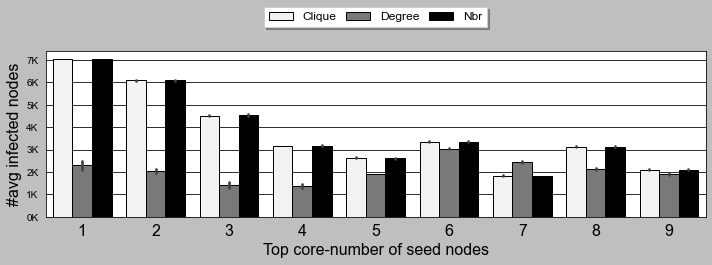

<Figure size 432x288 with 0 Axes>

In [6]:
for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)'][:3]
    
    fig, ax = plt.subplots(figsize=(10, 4))
    bar = sns.barplot(x='core number sorted', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number sorted'] < 10)], color='k')
    plt.xlabel('Top core-number of seed nodes', fontsize=fontsize-2)
    plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    plt.xticks(fontsize=fontsize-2)
    # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)


    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_sorted.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
    plt.show()
    plt.clf()
    # break

dblp_prev_infected_fig1.pdf


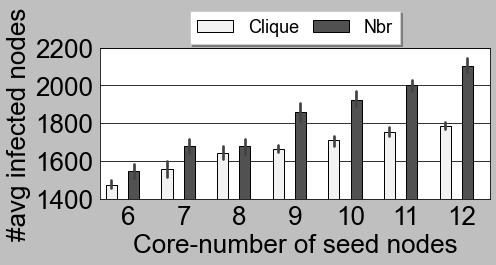

<Figure size 432x288 with 0 Axes>

In [13]:
fontsize = 28
labelsize = 20

# Fig 1
save = True
for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
    fig, ax = plt.subplots(figsize=(7, 4))
    bar = sns.barplot(x='core number', y=y_var, hue='algo', hue_order=include_algos,
            data=result_df[(result_df['core number'] <= 12) & 
                           (result_df['core number'] >= 6) &
                           (result_df['algo'].isin(['Clique', 'Nbr']))], 
                           color='k')
    plt.xlabel('Core-number of seed nodes', fontsize=fontsize-2)
    plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
    plt.ylim(1400, 2200)

    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    
    # plt.legend(loc='upper center', bbox_to_anchor=(
    #     0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # subset of legends
    x,y = ax.get_legend_handles_labels()
    x= [x[0], x[2]]
    y= [y[0], y[2]]
    ax.get_legend().remove()
    plt.legend(*(x,y),loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)
    

    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_fig1.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
    plt.show()
    plt.clf()
    # break

dblp_prev_infected_fig2.pdf


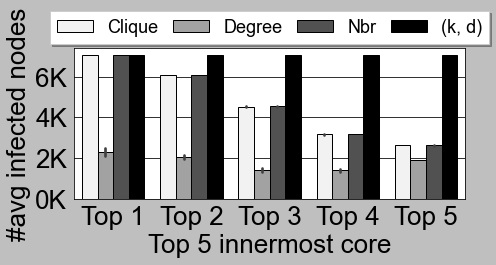

<Figure size 432x288 with 0 Axes>

In [8]:
fontsize = 28
labelsize = 20

# Fig 2:
save = True
for y_var in ['infected', 'neighbors'][:1]:

    # if(dataset == "dblp"):
    #     result_df = result_df[result_df['seed size'] >= 300]
    
    sns.set_style("dark", {'axes.grid' : True})
    plt.style.use('grayscale')

    hatch_dict = {
        'Nbr': "O",
        '(k, d)': '.',
        'Clique': 'x',
        'Degree': '*'
    }

    include_algos = ['Clique', 'Degree', 'Nbr', '(k, d)']
    
    fig, ax = plt.subplots(figsize=(7, 4))
    bar = sns.barplot(x='core number sorted', y=y_var, hue='algo', hue_order=include_algos, data=result_df[(result_df['core number sorted'] < 6)], color='k')
    plt.xlabel('Top 5 innermost core', fontsize=fontsize-2)
    plt.ylabel("#avg infected nodes", fontsize=fontsize-2)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
    labels = ["Top " + str(item.get_text()) for item in ax.get_xticklabels()]
    # labels[1] = 'Testing'
    plt.yticks(fontsize=fontsize-2)
    ax.set_xticklabels(labels, fontsize=fontsize-2)
    # plt.xticks(fontsize=fontsize-2)
    # plt.yticks([0, 2000, 4000, 6000, 8000], fontsize=fontsize-2)
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.5, 1.3), ncol=4, fancybox=False, shadow=True, fontsize=labelsize-2, columnspacing=0.8)

    # h = itertools.cycle([hatch_dict[i] for i in include_algos])
    # for i,thisbar in enumerate(bar.patches):
    #     if i%len(include_algos)==0:
    #         hatch = next(h)
    #     thisbar.set_hatch(hatch)


    plt.tight_layout()
    filename = dataset + "_prev_" + y_var + "_fig2.pdf"
    print(filename)
    if(save):
        plt.savefig("../fig/" + filename)
    plt.show()
    plt.clf()
    # break

In [19]:
result_df[result_df['algo'] == 'Degree']['core number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13])

In [29]:
result_df[result_df['algo'] == 'Nbr']['core number'].unique()[-5:]

array([111, 113, 135, 252, 279])

In [30]:
result_df[result_df['algo'] == 'Clique']['core number'].unique()[-5:]

array([111, 113, 135, 252, 279])

In [31]:
result_df[result_df['algo'] == '(k, d)']['core number'].unique()[-5:]

array([275, 276, 277, 278, 279])

In [ ]:
sns.color_palette(palette="colorblind", n_colors=3))